<a href="https://colab.research.google.com/github/yusufdemir75/MachineLearning/blob/main/MicrosoftBeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphanelerin yüklenmesi
!pip install torch torchvision transformers scikit-learn

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
#google drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

# Resimlerin bulunduğu klasör
data_dir = '/content/drive/MyDrive/sunum/data'

# Verileri işlemek için dönüşüm işlemleri
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Verisetimizi yükleme
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Verisetini eğitim ve doğrulama setlerine bölüyoruz
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# DataLoader'ları oluşturun
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
from transformers import BeitForImageClassification, BeitFeatureExtractor
import torch

# Sınıf sayısı
num_classes = 7

# Beit modelini ve feature extractor'ı yükleme
model_name = 'microsoft/beit-base-patch16-224-pt22k-ft22k'
model = BeitForImageClassification.from_pretrained(model_name, num_labels=num_classes, ignore_mismatched_sizes=True)
feature_extractor = BeitFeatureExtractor.from_pretrained(model_name)

# GPU kullanımı için modeli CUDA'ya taşımam gerek
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224-pt22k-ft22k and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([21841, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([21841]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BeitForImageClassification(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (int

Epoch 1/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 1.0806, Train Accuracy: 0.6223
Validation Loss: 0.5988, Validation Accuracy: 0.8130
Epoch 2/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.3532, Train Accuracy: 0.8971
Validation Loss: 0.4245, Validation Accuracy: 0.8735
Epoch 3/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.1228, Train Accuracy: 0.9737
Validation Loss: 0.4083, Validation Accuracy: 0.8842
Epoch 4/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.0550, Train Accuracy: 0.9907
Validation Loss: 0.4035, Validation Accuracy: 0.8767
Epoch 5/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.0365, Train Accuracy: 0.9934
Validation Loss: 0.4078, Validation Accuracy: 0.8746


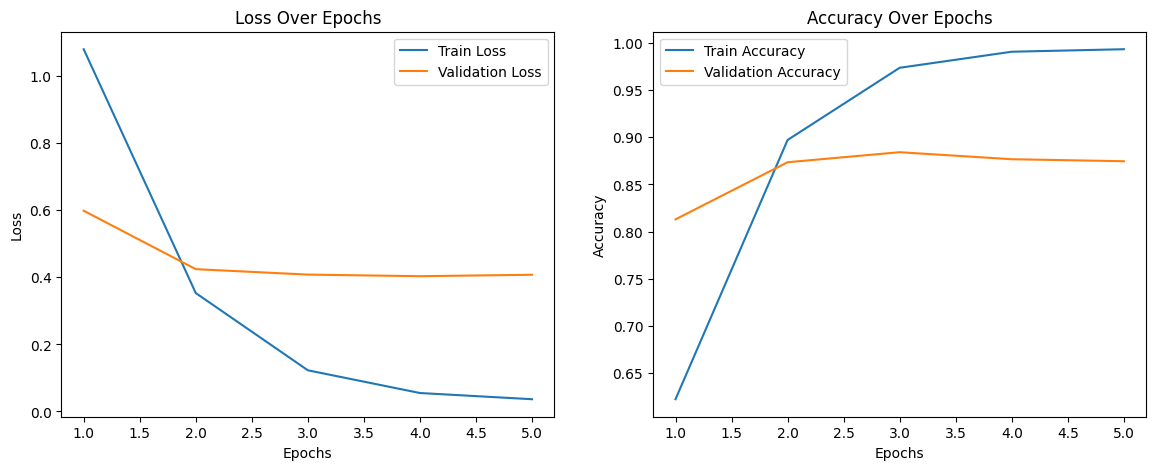

In [ ]:
from torch.optim import AdamW
from transformers import get_scheduler
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Hiperparametreleri belirleyin
num_epochs = 5
learning_rate = 5e-5

# Optimizatörü ve öğrenme oranı çizelgesini oluşturun
optimizer = AdamW(model.parameters(), lr=learning_rate)
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_epochs * len(train_loader)
)

# Kayıp fonksiyonunu tanımlayın
loss_fn = torch.nn.CrossEntropyLoss()

# Eğitim ve doğrulama loss ve accuracy değerlerini depolayacak listeler
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Modeli eğitin
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss = 0
    train_correct = 0
    val_loss = 0
    val_correct = 0

    # Eğitim aşaması
    model.train()
    for batch in tqdm(train_loader):
        pixel_values = batch[0].to(device)
        labels = batch[1].to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values, labels=labels)
        loss = loss_fn(outputs.logits, labels)

        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        train_loss += loss.item() * pixel_values.size(0)
        train_correct += (outputs.logits.argmax(dim=-1) == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Doğrulama aşaması
    model.eval()
    with torch.no_grad():
        for batch in tqdm(val_loader):
            pixel_values = batch[0].to(device)
            labels = batch[1].to(device)
            outputs = model(pixel_values, labels=labels)
            loss = loss_fn(outputs.logits, labels)

            val_loss += loss.item() * pixel_values.size(0)
            val_correct += (outputs.logits.argmax(dim=-1) == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = val_correct / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Loss ve Accuracy değerlerini grafik olarak gösterme
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

100%|██████████| 30/30 [00:14<00:00,  2.08it/s]


Accuracy: 0.8746014877789585
Precision: 0.8754534386076457
Recall: 0.8746014877789585
F1 Score: 0.8742787922559774
Matthews Correlation Coefficient: 0.8535287307785334
ROC AUC: 0.9861816619927892


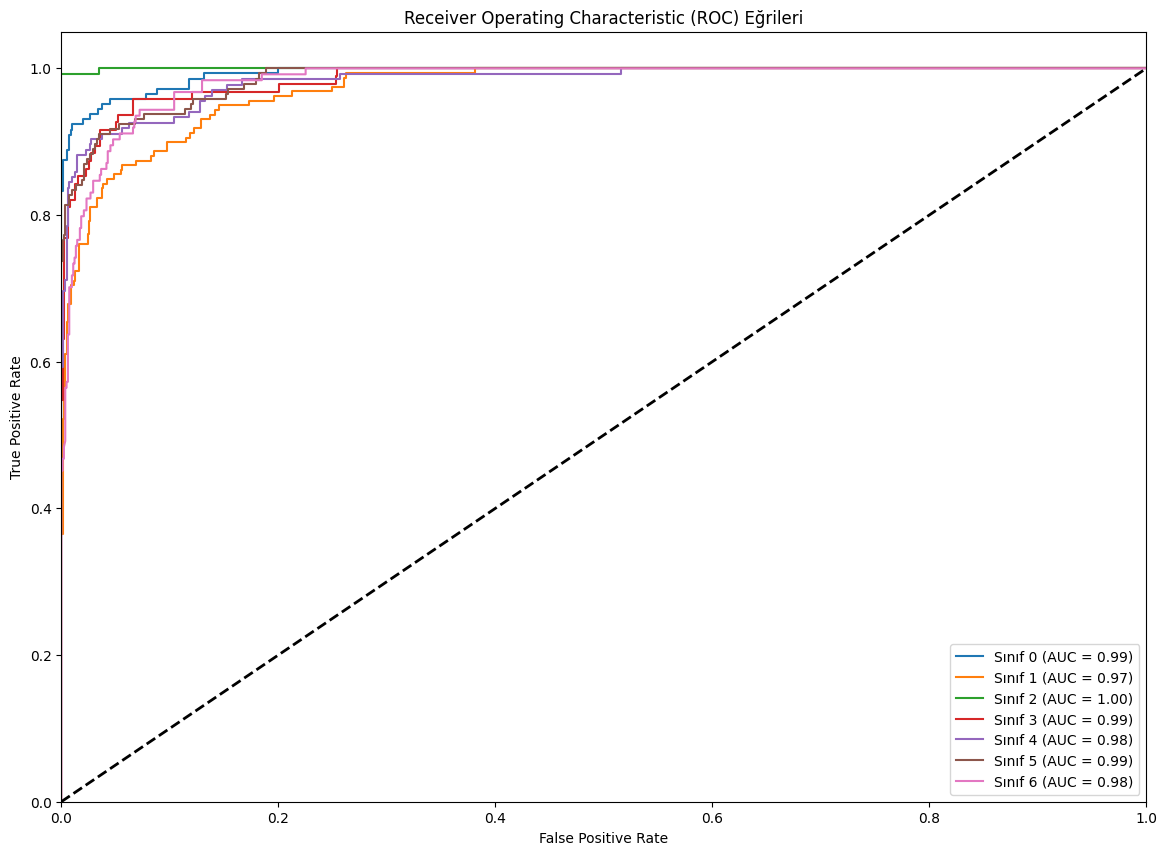

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, matthews_corrcoef
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Model değerlendirilmesi
model.eval()
all_predictions = []
all_labels = []
all_logits = []

for batch in tqdm(val_loader):
    pixel_values = batch[0].to(device)
    labels = batch[1].to(device)

    with torch.no_grad():
        outputs = model(pixel_values, labels=labels)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
    all_logits.extend(F.softmax(logits, dim=-1).cpu().numpy())  # softmax uygulanması

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')
mcc = matthews_corrcoef(all_labels, all_predictions)

# ROC AUC hesaplama
all_logits = np.array(all_logits)
roc_auc = roc_auc_score(all_labels, all_logits, multi_class='ovr', average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC: {roc_auc}")

# ROC eğrileri için kod
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
n_classes = num_classes

# Her sınıf için ROC eğrisi hesaplama
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(all_labels) == i, all_logits[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Her sınıf için ROC eğrilerini çizme
plt.figure(figsize=(14, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (AUC = {roc_auc_dict[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Eğrileri')
plt.legend(loc='lower right')
plt.show()
